# EDA using SF Salaries

In [113]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [114]:
df = pd.read_csv('data/Salaries.csv')

C:\Users\Lenovo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (3,4,5,6,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [115]:
df

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966,245132,137811,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739,106088,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.7,198307,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134402,9737,182235,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0,0,0,0,0.00,0.00,2014,NaN,San Francisco,PT
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148049 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          112495 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


In [117]:
df.describe()

,Id,TotalPay,TotalPayBenefits,Year,Notes
count,148654.000000,148654.000000,148654.000000,148654.000000,0.0
mean,74327.500000,74768.321972,93692.554811,2012.522643,NaN
std,42912.857795,50517.005274,62793.533483,1.117538,NaN
min,1.000000,-618.130000,-618.130000,2011.000000,NaN
25%,37164.250000,36168.995000,44065.650000,2012.000000,NaN
50%,74327.500000,71426.610000,92404.090000,2013.000000,NaN
75%,111490.750000,105839.135000,132876.450000,2014.000000,NaN
max,148654.000000,567595.430000,567595.430000,2014.000000,NaN


### what is the average Basepay

In [118]:
df['BasePay'].unique()

array([167411.18, 155966.02, 212739.13, ..., '6.04', '15.5',
       'Not Provided'], dtype=object)

In [119]:
df['BasePay'].replace('Not Provided' , 0 , inplace = True)
df['BasePay'] = df['BasePay'].astype(float)
df['BasePay'].mean()

66323.65685410085

### what is the height and lower Overtimepay in a data set 

In [120]:
df['OvertimePay'].replace('Not Provided' , 0 , inplace = True)
df['OvertimePay'] = df['OvertimePay'].astype(float)
df['OvertimePay'].max()

245131.88

In [121]:
df['OvertimePay'].min()

-0.01

### what is the jop title of JOSEPH DRISCOLL

In [122]:
df[df['EmployeeName'] == 'JOSEPH DRISCOLL']['JobTitle']

24    CAPTAIN, FIRE SUPPRESSION
Name: JobTitle, dtype: object

### How much joseph make(including benefits)

In [123]:
df[df['EmployeeName'] == 'JOSEPH DRISCOLL']['TotalPayBenefits']

24    270324.91
Name: TotalPayBenefits, dtype: float64

### what is the name of the person who makes the max

In [124]:
heigh_sal = df['TotalPayBenefits'].max()
df[df['TotalPayBenefits'] == heigh_sal]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN


### what is the average BasePay of all employees per year

In [125]:
x = df.groupby('Year').mean()['BasePay']

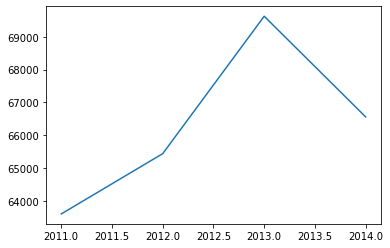

In [126]:
x = df.groupby('Year').mean()['BasePay']
plt.plot(x)

### what is the top 5 jops most required 

In [127]:
df['JobTitle'].value_counts().head()

Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: JobTitle, dtype: int64

### How many people have the word chief in job title

In [128]:
def chief(string):
    if 'chief' in (string.lower()):
        return True
    else :
        return False

In [129]:
(df['JobTitle'].apply(lambda x:chief(x))).sum()

627

### is there a correlation between the length of jop title and the salary

In [130]:
df['ntitles'] = df['JobTitle'].apply(len)

In [131]:
df[['ntitles' , 'TotalPayBenefits']].corr()

,ntitles,TotalPayBenefits
ntitles,1.000000,-0.036878
TotalPayBenefits,-0.036878,1.000000
